In [4]:
# Step 1: Import required libraries
import pandas as pd
import re

# Step 2: Load datasets
eda_df = pd.read_csv("data/raw/eda_data.csv")
glassdoor_df = pd.read_csv("data/raw/glassdoor_jobs.csv")

# Step 3: Clean merging key columns
def clean_merge_keys(df):
    df['Job Title'] = df['Job Title'].astype(str).str.strip().str.lower()
    df['Location'] = df['Location'].astype(str).str.strip().str.lower()
    df['Company Name'] = (
        df['Company Name']
        .astype(str)
        .str.extract(r'^(.*?)(?:\\n|\n|\s*\d+\.\d+)?$')[0]
        .str.strip()
        .str.lower()
    )
    return df

eda_df = clean_merge_keys(eda_df)
glassdoor_df = clean_merge_keys(glassdoor_df)

# Step 4: Merge datasets
merged_df = pd.merge(
    eda_df,
    glassdoor_df,
    on=['Job Title', 'Company Name', 'Location'],
    how='inner',
    suffixes=('_eda', '_glassdoor')
)

# Step 5: Save the merged dataset (optional)
merged_output_path = "data/enriched/salary_data_enriched.csv"
merged_df.to_csv(merged_output_path, index=False)

# Step 6: Clean the merged dataset
# Identify the correct salary estimate column
salary_column = None
for col in merged_df.columns:
    if 'salary estimate' in col.lower():
        salary_column = col
        break

if salary_column is None:
    raise KeyError("❌ No salary estimate column found in merged data.")

# Drop rows with missing salary info
merged_df = merged_df.dropna(subset=[salary_column])


# Remove unnecessary columns
merged_df = merged_df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], errors='ignore')

# Step 7: Extract average salary from salary range
def extract_salary(sal_str):
    match = re.search(r'(\d+)[kK]?.*?(\d+)?[kK]?', sal_str)
    if match:
        low = int(match.group(1))
        high = int(match.group(2)) if match.group(2) else low
        return (low + high) / 2
    return None

merged_df['Average Salary (k)'] = merged_df[salary_column].apply(lambda x: extract_salary(str(x)))

# Drop rows with failed salary extraction
merged_df = merged_df.dropna(subset=['Average Salary (k)'])

# Drop original salary column
merged_df = merged_df.drop(columns=[salary_column], errors='ignore')

# Step 8: Save the cleaned dataset
final_output_path = "data/processed/salary_data_cleaned.csv"
merged_df.to_csv(final_output_path, index=False)

# Step 9: Confirm and preview
print("✅ Data processing complete!")
print("📦 Final Rows:", merged_df.shape[0])
print("📊 Final Columns:", merged_df.shape[1])
print("💾 Cleaned file saved to:", final_output_path)
print("\n🔍 Final Preview:")
print(merged_df.head())


✅ Data processing complete!
📦 Final Rows: 1418
📊 Final Columns: 45
💾 Cleaned file saved to: data/processed/salary_data_cleaned.csv

🔍 Final Preview:
   Unnamed: 0_eda                  Job Title  \
0               0             data scientist   
1               1  healthcare data scientist   
2               2             data scientist   
3               2             data scientist   
4               3             data scientist   

                                 Job Description_eda  Rating_eda  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...         3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...         3.4   
2  KnowBe4, Inc. is a high growth information sec...         4.8   
3  KnowBe4, Inc. is a high growth information sec...         4.8   
4  *Organization and Job ID**\nJob ID: 310709\n\n...         3.8   

                            Company Name         Location Headquarters_eda  \
0                      tecolote research  albuquerque, nm       Goleta, CA 

In [5]:
# Step 7 Exploratory Data Analysis (EDA)
# import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
# for better visualization
sns.set(style="whitegrid") 

C:\Users\dines\AppData\Local\Temp\ipykernel_24772\257438355.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_roles.index, x=top_roles.values, palette='viridis')


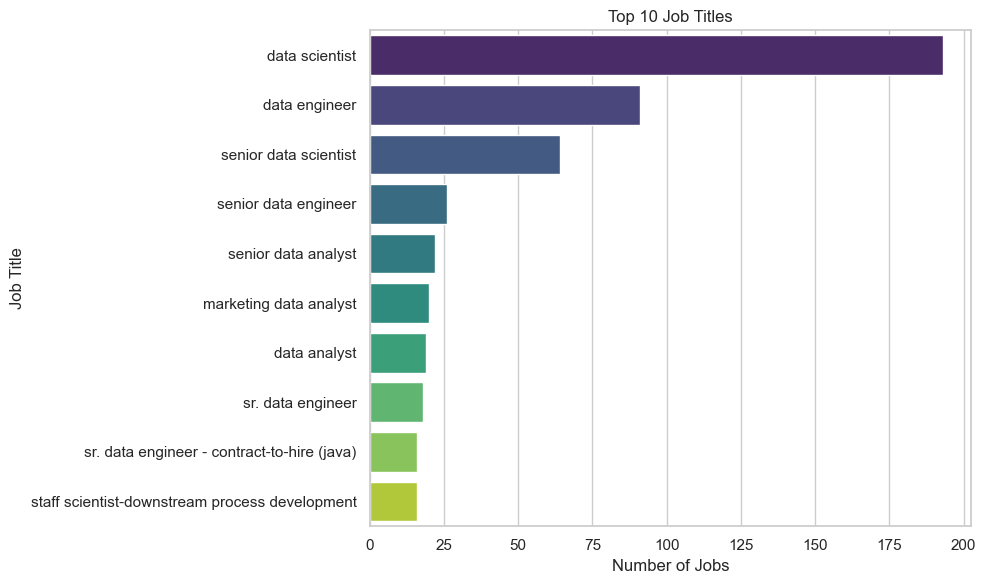

In [6]:
# Top Job Titles by Frequency
plt.figure(figsize=(10, 6))
top_roles = merged_df['Job Title'].value_counts().head(10)
sns.barplot(y=top_roles.index, x=top_roles.values, palette='viridis')
plt.title('Top 10 Job Titles')
plt.xlabel('Number of Jobs')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

C:\Users\dines\AppData\Local\Temp\ipykernel_24772\2578166471.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_role.values, y=avg_salary_by_role.index, palette='coolwarm')


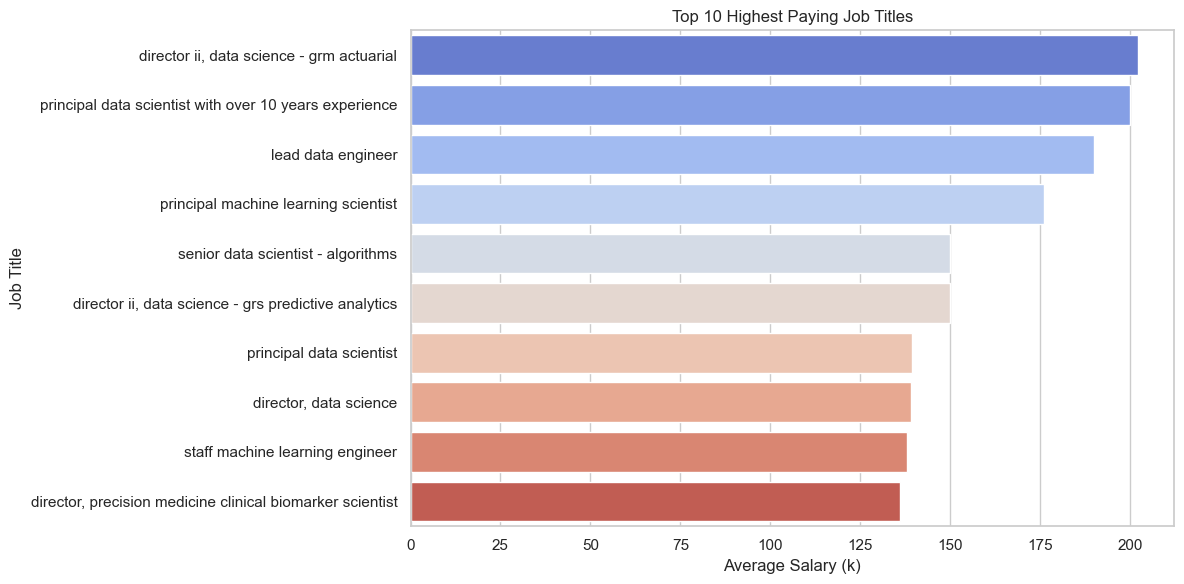

In [7]:
# Average Salary by Job Title
plt.figure(figsize=(12, 6))
avg_salary_by_role = merged_df.groupby('Job Title')['Average Salary (k)'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_salary_by_role.values, y=avg_salary_by_role.index, palette='coolwarm')
plt.title('Top 10 Highest Paying Job Titles')
plt.xlabel('Average Salary (k)')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

C:\Users\dines\AppData\Local\Temp\ipykernel_24772\1622807400.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_companies.index, x=top_companies.values, palette='magma')


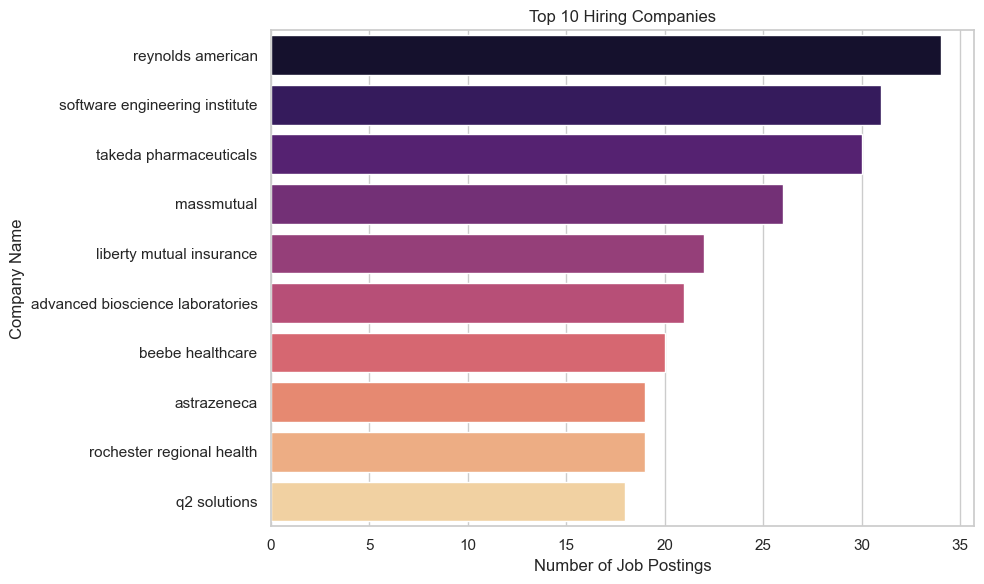

In [8]:
# Top Hiring Companies
plt.figure(figsize=(10, 6))
top_companies = merged_df['Company Name'].value_counts().head(10)
sns.barplot(y=top_companies.index, x=top_companies.values, palette='magma')
plt.title('Top 10 Hiring Companies')
plt.xlabel('Number of Job Postings')
plt.ylabel('Company Name')
plt.tight_layout()
plt.show()


C:\Users\dines\AppData\Local\Temp\ipykernel_24772\1154309207.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df[merged_df['Location'].isin(top_locations)],


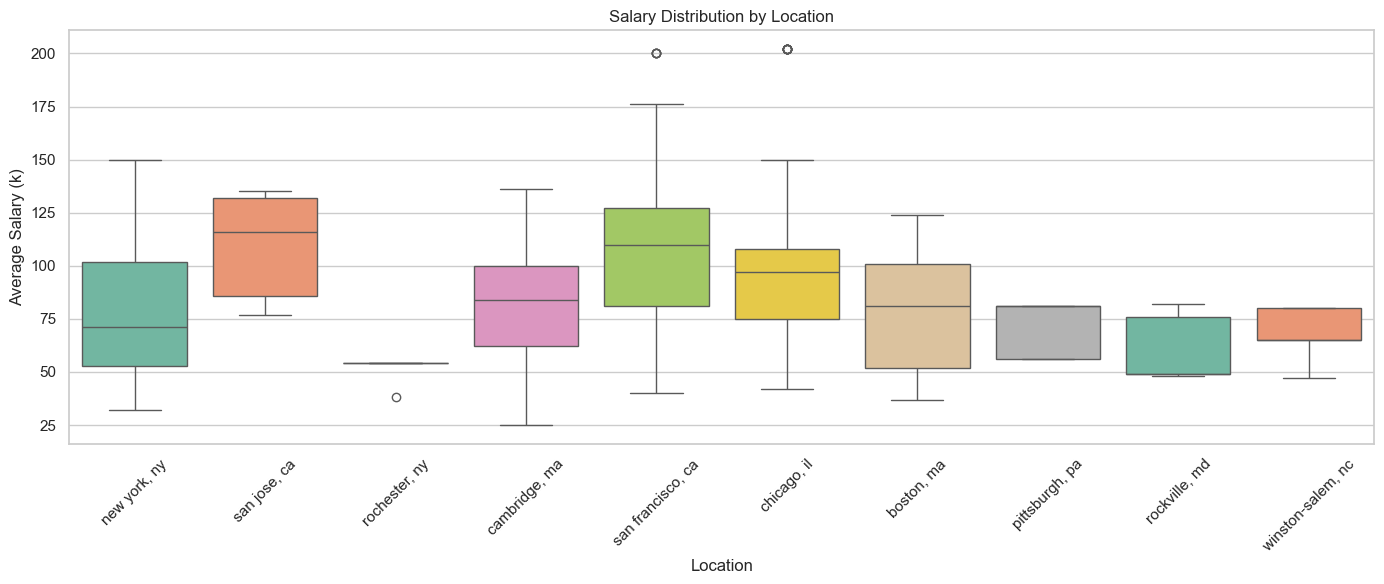

In [9]:
# Salary Distribution By Location
plt.figure(figsize=(14, 6))
top_locations = merged_df['Location'].value_counts().head(10).index
sns.boxplot(data=merged_df[merged_df['Location'].isin(top_locations)],
            x='Location', y='Average Salary (k)', palette='Set2')
plt.title('Salary Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Average Salary (k)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


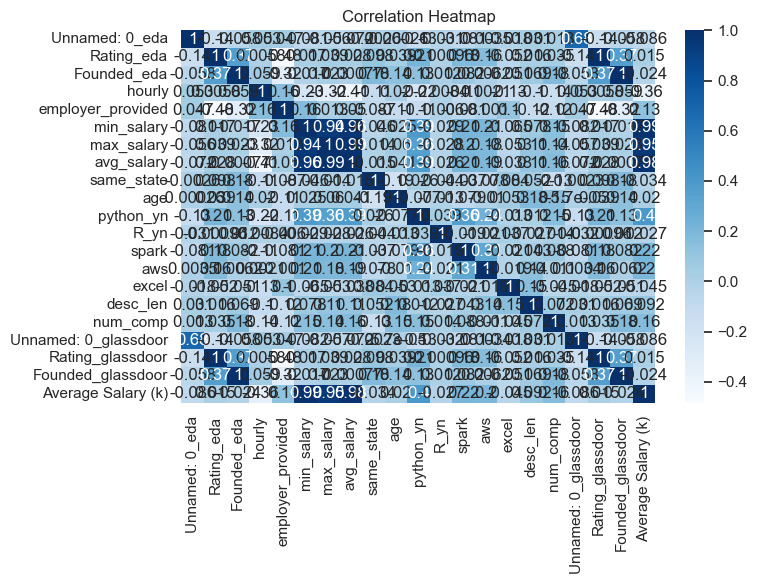

In [10]:
# Correlation of a Heatmap with a Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(merged_df.select_dtypes(include='number').corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [14]:
# Step 8 Analyze skills vs average salary
# Define relevant skills (all lowercase to match column names)
skills = ['python', 'sql', 'excel', 'aws', 'tableau']

# Dictionary to store average salaries
skill_salary = {}

# Calculate average salary for jobs requiring each skill
for skill in skills:
    col_name = f'{skill}_yn'
    if col_name in merged_df.columns:
        avg_salary = merged_df[merged_df[col_name] == 1]['Average Salary (k)'].mean()
        skill_salary[skill.capitalize()] = round(avg_salary, 2)
    else:
        print(f"Column {col_name} not found!")

# Display results
print("💼 Average Salary by Skill:")
for skill, salary in skill_salary.items():
    print(f"{skill}: ₹{salary}k")


💼 Average Salary by Skill:
Python: ₹86.68k
Sql: ₹76.02k
Excel: ₹71.48k
Aws: ₹85.08k
Tableau: ₹70.72k


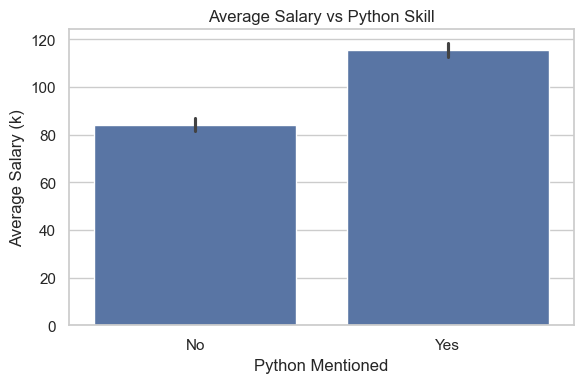

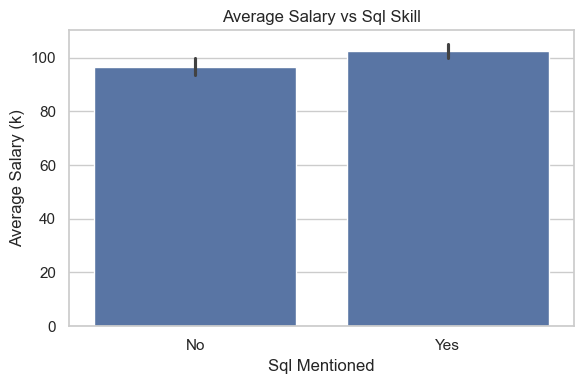

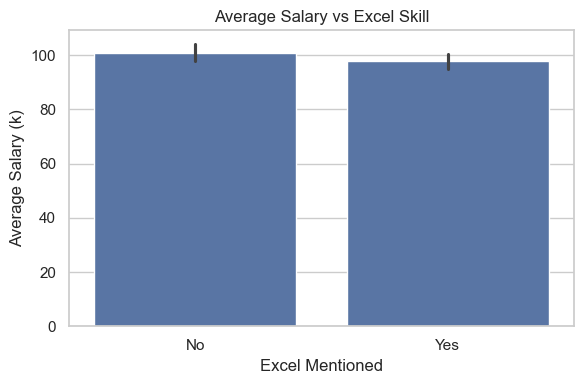

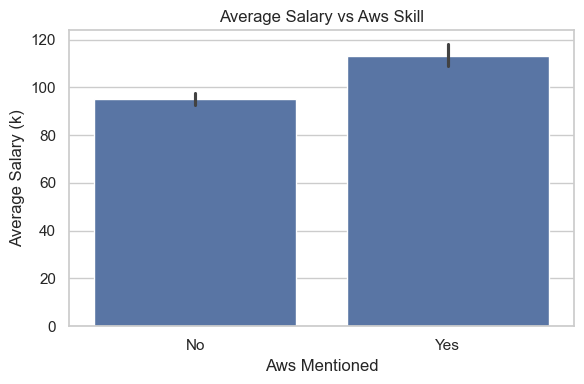

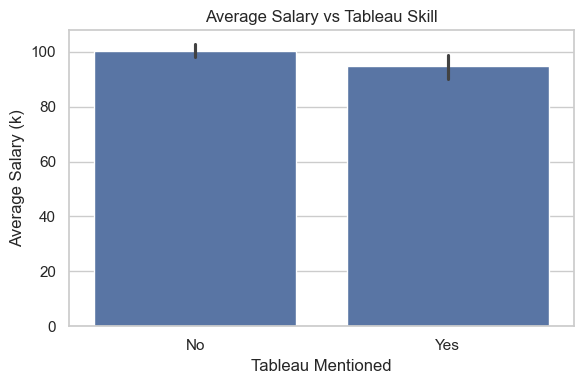

In [15]:
#Plot average salary for jobs that mention each skill
for skill in skills:
    plt.figure(figsize=(6, 4))
    sns.barplot(data=merged_df, x=f"{skill}_yn", y="avg_salary")
    plt.title(f'Average Salary vs {skill.title()} Skill')
    plt.xlabel(f"{skill.title()} Mentioned")
    plt.ylabel("Average Salary (k)")
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.tight_layout()
    plt.show()

C:\Users\dines\AppData\Local\Temp\ipykernel_24772\3979777772.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=experience_salary, x='seniority', y='Average Salary (k)', palette='viridis')
C:\Users\dines\AppData\Local\Temp\ipykernel_24772\3979777772.py:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
d:\SmartPayPlus\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


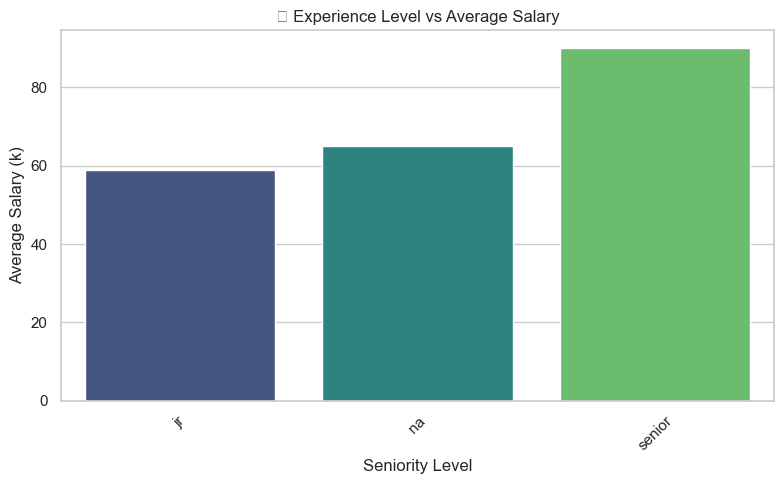

In [16]:
# Step 9: Analyze experience level vs average salary
# Group by seniority level and compute average salary
experience_salary = merged_df.groupby('seniority')['Average Salary (k)'].mean().reset_index()

# Barplot
plt.figure(figsize=(8, 5))
sns.barplot(data=experience_salary, x='seniority', y='Average Salary (k)', palette='viridis')
plt.title('📈 Experience Level vs Average Salary')
plt.xlabel('Seniority Level')
plt.ylabel('Average Salary (k)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\dines\AppData\Local\Temp\ipykernel_24772\29785434.py:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
d:\SmartPayPlus\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


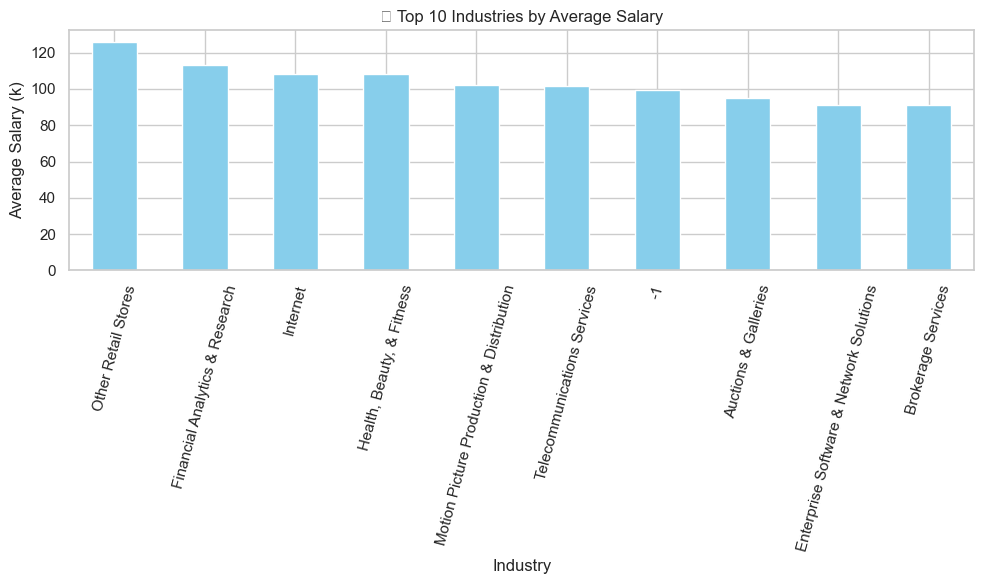

In [17]:
# Step 10 Industry and sector-based insights
# Industry-wise salary
industry_salary = merged_df.groupby('Industry_eda')['Average Salary (k)'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
industry_salary.plot(kind='bar', color='skyblue')
plt.title('📊 Top 10 Industries by Average Salary')
plt.xlabel('Industry')
plt.ylabel('Average Salary (k)')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


C:\Users\dines\AppData\Local\Temp\ipykernel_24772\2243123865.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
d:\SmartPayPlus\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


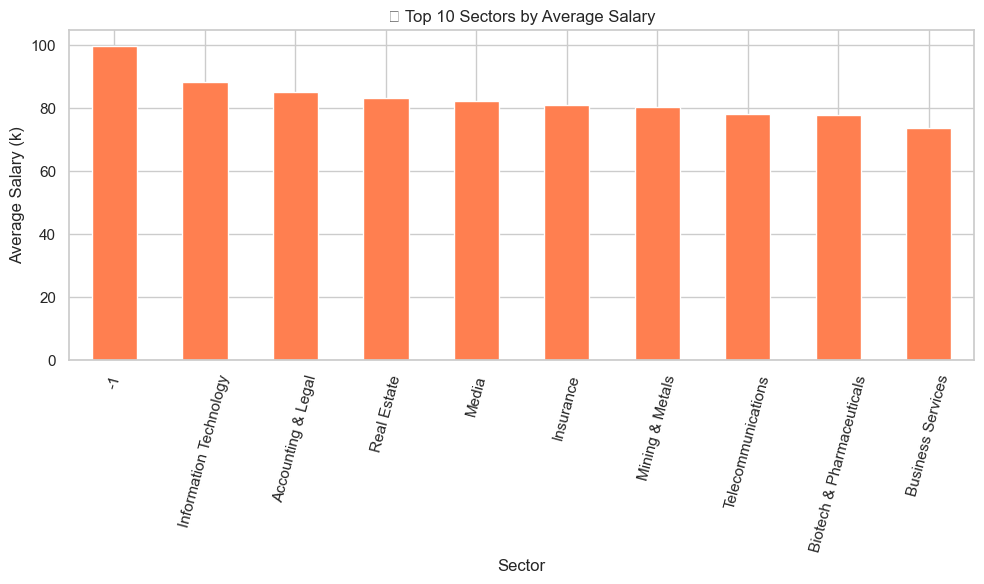

In [18]:
# Sector-wise salary
sector_salary = merged_df.groupby('Sector_eda')['Average Salary (k)'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sector_salary.plot(kind='bar', color='coral')
plt.title('📊 Top 10 Sectors by Average Salary')
plt.xlabel('Sector')
plt.ylabel('Average Salary (k)')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


In [21]:
# Now Proceed with Data PreProcessing and Feature Selection
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Drop rows with missing salary
df_model = merged_df[merged_df['avg_salary'].notnull()].copy()

# Step 2: Select relevant features
features = [
    'Rating_eda', 'desc_len', 'age', 'python_yn', 'excel', 'spark', 'aws', 'R_yn',
    'job_simp', 'seniority', 'Industry_eda', 'Sector_eda'
]

X = df_model[features]
y = df_model['avg_salary']

# Step 3: One-hot encode categorical features
X = pd.get_dummies(X, columns=['job_simp', 'seniority', 'Industry_eda', 'Sector_eda'], drop_first=True)

# Step 4: Scaling numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


📊 Linear Regression
MAE: 16.84
RMSE: 22.10
R² Score: 0.69
----------------------------------------
📊 Random Forest
MAE: 5.34
RMSE: 11.99
R² Score: 0.91
----------------------------------------
📊 XGBoost
MAE: 8.83
RMSE: 13.28
R² Score: 0.89
----------------------------------------


C:\Users\dines\AppData\Local\Temp\ipykernel_24772\330234291.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='RMSE', palette='viridis')
C:\Users\dines\AppData\Local\Temp\ipykernel_24772\330234291.py:55: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
d:\SmartPayPlus\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


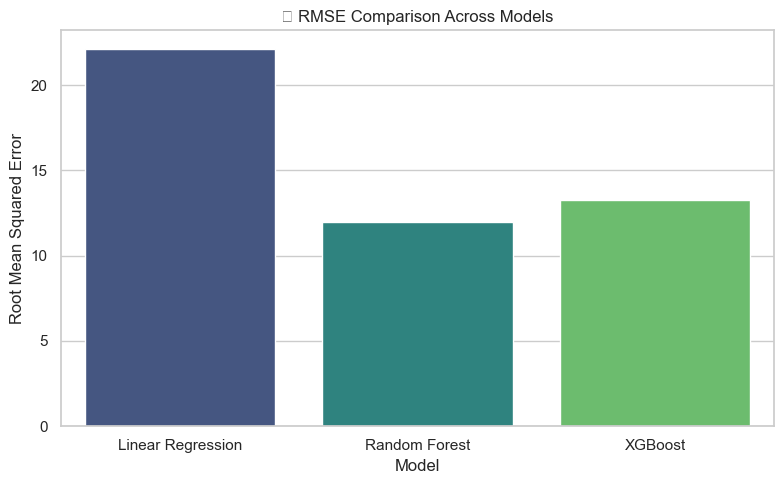

In [22]:
# Model Evaluation and comparison
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

results = []

# Train, predict, evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2 Score": r2
    })

    print(f"📊 {name}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    print("-" * 40)

# Create DataFrame for visualization
results_df = pd.DataFrame(results)

# Plot RMSE comparison
plt.figure(figsize=(8, 5))
sns.barplot(data=results_df, x='Model', y='RMSE', palette='viridis')
plt.title("📉 RMSE Comparison Across Models")
plt.ylabel("Root Mean Squared Error")
plt.xlabel("Model")
plt.tight_layout()
plt.show()


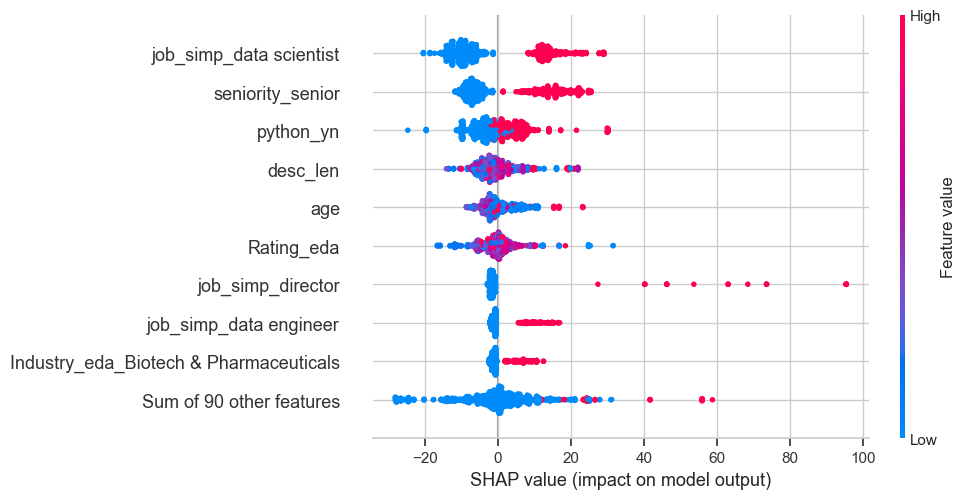

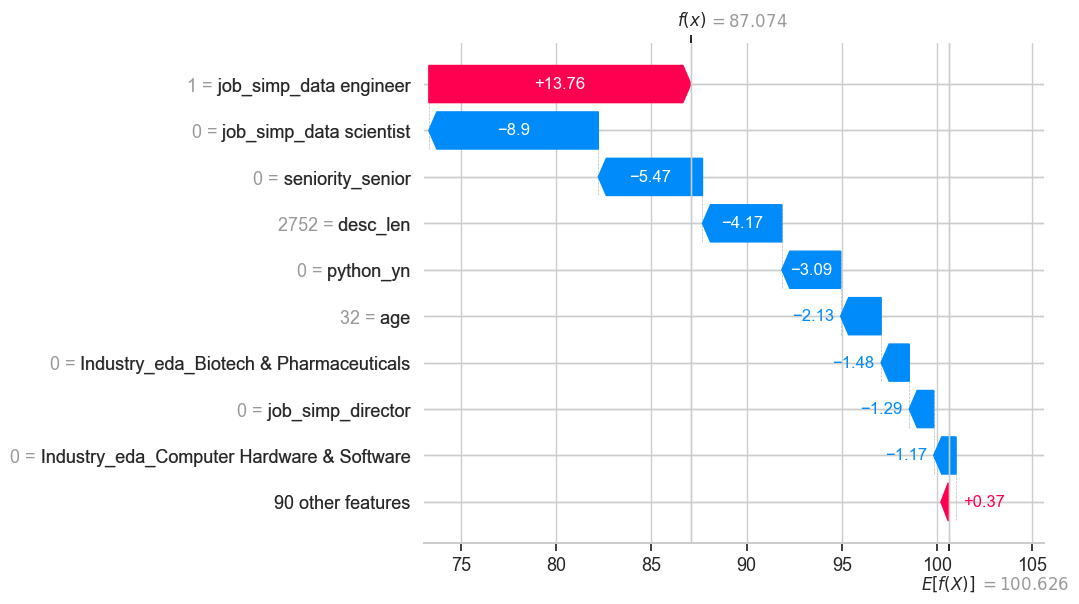

In [26]:
import shap

# Ensure all columns are float
X_numeric = X.astype(float)

# Initialize SHAP Explainer
explainer = shap.Explainer(best_model, X_numeric)
shap_values = explainer(X_numeric)

# Plot global feature importance
shap.plots.beeswarm(shap_values)

# Plot for individual prediction
shap.plots.waterfall(shap_values[0])


In [32]:
# Assign best_model based on best RMSE (lower is better)
# You can also use R2 if you prefer
best_model_name = results_df.sort_values('RMSE').iloc[0]['Model']
best_model = models[best_model_name]
print(f"Best model selected: {best_model_name}")

# If you want a separate validation set, split it here (optional)
# For now, X_test and y_test are used for evaluation
X_val, y_val = X_test, y_test

# Export the best model using joblib
import joblib
model_export_path = 'outputs/best_salary_model.joblib'
joblib.dump(best_model, model_export_path)
print(f"Model exported to {model_export_path}")




Best model selected: Random Forest
Model exported to outputs/best_salary_model.joblib


In [33]:
# Save feature columns for reproducibility and deployment
import joblib
joblib.dump(X.columns.tolist(), 'outputs/model_features.joblib')
print('Feature columns saved to outputs/model_features.joblib')

Feature columns saved to outputs/model_features.joblib


In [34]:
# Load and display the saved feature columns from joblib file
import joblib
features = joblib.load('outputs/model_features.joblib')
print('Feature columns:', features)

Feature columns: ['Rating_eda', 'desc_len', 'age', 'python_yn', 'excel', 'spark', 'aws', 'R_yn', 'job_simp_data engineer', 'job_simp_data scientist', 'job_simp_director', 'job_simp_manager', 'job_simp_mle', 'job_simp_na', 'seniority_na', 'seniority_senior', 'Industry_eda_Accounting', 'Industry_eda_Advertising & Marketing', 'Industry_eda_Aerospace & Defense', 'Industry_eda_Architectural & Engineering Services', 'Industry_eda_Auctions & Galleries', 'Industry_eda_Banks & Credit Unions', 'Industry_eda_Beauty & Personal Accessories Stores', 'Industry_eda_Biotech & Pharmaceuticals', 'Industry_eda_Brokerage Services', 'Industry_eda_Colleges & Universities', 'Industry_eda_Computer Hardware & Software', 'Industry_eda_Construction', 'Industry_eda_Consulting', 'Industry_eda_Consumer Product Rental', 'Industry_eda_Consumer Products Manufacturing', 'Industry_eda_Department, Clothing, & Shoe Stores', 'Industry_eda_Education Training Services', 'Industry_eda_Energy', 'Industry_eda_Enterprise Software